# Lab -- Basic representations for digital signals and systems

Par [J.-F. Bercher](http://www.esiee.fr/~bercherj) -- le 12 novembre 2013 <br>
English translation and update: february 21, 2014

In [96]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#import mpld3
#mpld3.enable_notebook()

>This lab is an elementary introduction to the analysis of a filtering operation. In particular, we will illustrate the notions of impulse response, convolution, frequency representation transfer function.

>In these exercises, we will work with digital signals. Experiments will be done with Python. 

>We will work with the filtering operation described by the following difference equation
$$
y(n)=a y(n-1) + x(n)
$$
where $x(n)$ is the filter's input and  $y(n)$ its output.

## Study in the time domain

>1. Compute analytically the impuse response (IR), as a function of the parameter $a$, assuming that the system is causal and that the initial conditions are zero.
>2. Under Python, look at the help of function lfilter, by `help(lfilter)` and try to understand how it works. Propose a method for computing numerically the impulse response. Then, check graphically the impulse response, with $a = 0.8$. The following Dirac function enables to generate a Dirac impulse in discrete time: 
>
        def dirac(n):
        """ dirac(n): returns a Dirac impulse on N points"""
        d=zeros(n); d[0]=1
        return d

>3. Compute and plot the impulse responses for $a=-0.8$, $a=0.99$, and $a=1.01$. Conclusions.

In [97]:
from pylab import *

We begin by creating a function that returns a  **Dirac impulse**, and test the result 

In [98]:
def dirac(n):
    """ dirac(n): returns a Dirac impulse on N points"""
    d=zeros(n); d[0]=1
    return d

(-5, 10)

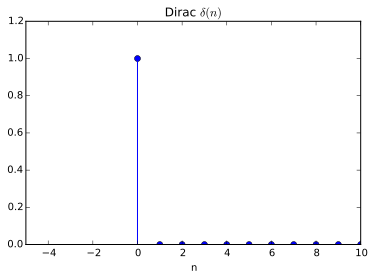

In [99]:
# Representation
N=100
stem(range(N),dirac(N))
title("Dirac $\delta(n)$")
xlabel("n")
ylim([0, 1.2])    # zoom for better visualization
xlim([-5, 10])

### The function scipy.signal *lfilter()*

In [100]:
import scipy
from scipy.signal import lfilter
help(lfilter)


Help on function lfilter in module scipy.signal.signaltools:

lfilter(b, a, x, axis=-1, zi=None)
    Filter data along one-dimension with an IIR or FIR filter.
    
    Filter a data sequence, `x`, using a digital filter.  This works for many
    fundamental data types (including Object type).  The filter is a direct
    form II transposed implementation of the standard difference equation
    (see Notes).
    
    Parameters
    ----------
    b : array_like
        The numerator coefficient vector in a 1-D sequence.
    a : array_like
        The denominator coefficient vector in a 1-D sequence.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        An N-dimensional input array.
    axis : int, optional
        The axis of the input data array along which to apply the
        linear filter. The filter is applied to each subarray along
        this axis.  Default is -1.
    zi : array_like, optional
        Initial conditions for th

according to the difference equation $y(n)=a y(n-1)+x(n)$ corresponds to the command `y=lfilter([1],[1, -a],x)`, whre, of course, $x$ and $a$ have been previously initialized. 


$\color{red}\Rightarrow$ **In order to obtain the impulse response, one simply have to  excite the system with an impulse! **


(<matplotlib.text.Text at 0x7fb620869470>,
 <matplotlib.text.Text at 0x7fb621d5c160>)

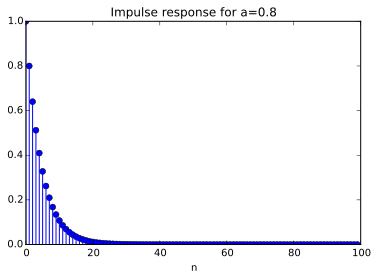

In [101]:
a=0.8
N=100
x=dirac(N)
y=lfilter([1],[1, -a],x)
stem(y), 
title("Impulse response for a={}".format(a)), xlabel("n")

The first values are:

In [102]:
print("First values \n y[:6]=" , y[:6])
print("to compare with a**n :\n", a**arange(0,6))


First values 
 y[:6]= [ 1.       0.8      0.64     0.512    0.4096   0.32768]
to compare with a**n :
 [ 1.       0.8      0.64     0.512    0.4096   0.32768]


We note that the `experimental` impulse response corresponds to the theoretical one, which is $h(n)=a^n$. 

We will check this for some other values of $a$. 

To ease our explorations, we will first define a function that returns the impulse reponse, for two vectors [b] and [a] describing any rational filter. It suffices to compute the filter's output, with a Dirac at its input, on a specified length:


In [103]:
def ri(b,a,n):
    """ Returns an impulse response of length n (int)
    of a filter with coefficients a and b
    """
    return lfilter(array(b),array(a),dirac(n))

Display of results
------------------

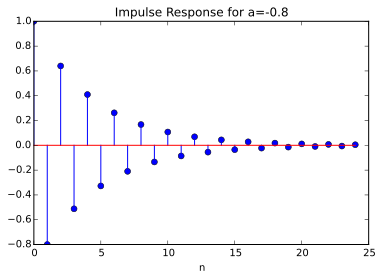

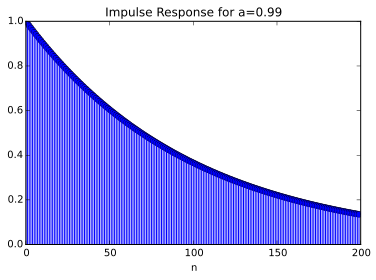

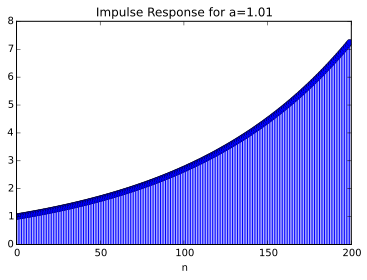

In [104]:
N=25
axe_n=range(N)
a=-0.8
figure()
stem(axe_n,ri([1],[1, -a],N))
title("Impulse Response for a={}".format(a))
xlabel("n")
#
N=200
axe_n=range(N)
a=0.99
figure()
stem(axe_n,ri([1],[1, -a],N))
title("Impulse Response for a={}".format(a))
xlabel("n")
#
a=1.01
figure()
stem(axe_n,ri([1],[1, -a],N))
title("Impulse Response for a={}".format(a))
xlabel("n")

**Conclusions:** 

* For $a<0$, the impulse response, theoretically $a^n$, is indeed of _alternate sign_

* for $a$ near 1, $a<1$, the impulse response is nearly constant

* for $a>1$, the impulse response diverges...

## Study in the frequency domain

>2. Give the expression of the transfer function $H(f)$, and of its modulus $|H(f)|$ for any $a$. Give the theoretical amplitudes at $f = 0$ and $f = 1/2$ (in normalized frequencies, _i.e._ normalized with respect to Fe. Compute numerically the transfer function as the Fourier transform of the impulse response, for $a = 0.8$ and $a = -0.8$, and plot the results. Conclusions.

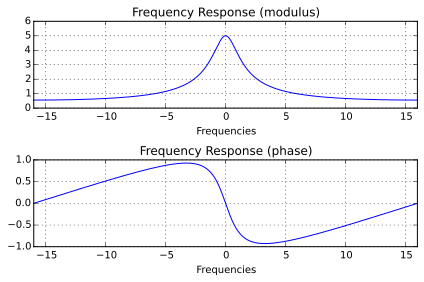

In [105]:
# We will need the fft functions
from numpy.fft import fft, ifft

# Computation of the impulse response
a=0.8
h=ri([1],[1, -a],300)

# Computation of the frequency response
M=1000
Fe=32
H=fftshift(fft(h,M))    # We use fftshift in order to center 
                        #the reprentation
f=arange(M)/M*Fe -Fe/2  # definition of the frequency axis

fig=figure(4)   # and display
subplot(2,1,1)
plot(f,abs(H),label="Frequency Response")
xlabel("Frequencies")
title("Frequency Response (modulus)")
grid(b=True)
xlim([-Fe/2, Fe/2])
subplot(2,1,2)
plot(f,angle(H),label=u"Frequency Response")
xlabel("Frequencies")
title("Frequency Response (phase)")
grid(b=True)
xlim([-Fe/2, Fe/2])
fig.tight_layout()   # avoid recovering of titles and labels

In [106]:
# Value at f=x: we look for it by find(f==x)
print ("Value at f=0 : ".rjust(20),H[find(f==0)].real)
print ("Value at f=Fe/2 : ",H[find(f==-Fe/2)].real)
print ("To compare with theoretical values")

     Value at f=0 :  [ 5.]
Value at f=Fe/2 :  [ 0.55555556]
To compare with theoretical values


## Filtering

>1. Create a sine wave $x$ of frequency $f0 = 3$, sampled at $Fe = 32$ on $N=128$ points 

>2. Filer this sine wave by the previous filter

>    – using the function filter, y1=lfilter([1],[1 -0.8],x); 

>    – using a convolution, y2=lfilter(h,1,x); with $h$ the impulse resonse of the filter for $a = 0.8$ 

>Explain why this last operation effectively corresponds to a convolution. Compare the two results. 

### Analysis in the time domain

(-1.2, 1.2)

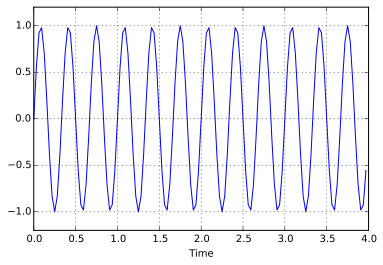

In [107]:
# Creation of the simple sine wave
N, fo, Fe = 128, 3, 32
t=arange(N)/Fe
x=sin(2*pi*fo*t)
figure(3)
plot(t,x)
xlabel("Time")
grid(b=True)
ylim([-1.2, 1.2])

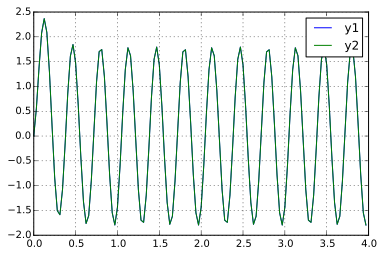

In [108]:
# Filtering with filter h
a=0.8
h=ri([1],[1, -a],N) # h computed again, but on N points
y1=lfilter([1],[1, -0.8],x)
y2=lfilter(h,[1],x)
figure()
plot(t,y1,label='y1')
plot(t,y2,label='y2')
grid(b=True)
legend()
show()


One can also plot the difference between the two signals, so things are clear!

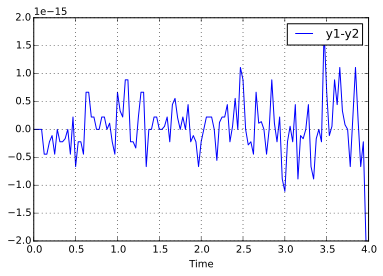

In [109]:
figure()
plot(t,y1-y2,label='y1-y2')
xlabel("Time")
grid(b=True)
legend()

We are now going to check **Plancherel's theorem** which says that the Fourier transform of a convolution product is the product of the Fourier transforms. 
We will simply observe that the output of a system, computed as the inverse Fourier transform of the product of the transfer function $H$  with the Fourier transform $X$ of the input signal is identical (or at least extremely similar) to the output computed by convolution or as solution of the difference equation. 

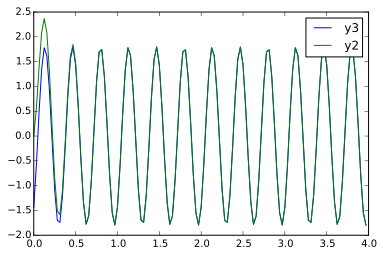

In [110]:
y3=real(ifft(fft(h)*fft(x)))
plot(t,y3,label='y3')
plot(t,y2,label='y2')
legend()

The difference observed at the beginning of the two plots comes from a different assumption on the values of the signals at negative (non observed) times. Actually, function`lfilter` assumes that the signal is zero where non observed, which implies a transient response at the output of the filter. The Fourier transform is computed with the algorithm of `fft`, which assumes that all signals are periodics, thus periodised outside the observation interval. We will discuss this in more details later. 

### Frequency representation

>3. Plot the transfer function and the Fourier transform of the sine wave. What will be the result of the product? Measure the gain and phase of the transfer function at the frequency of the sinusoid ($f_0=3$). Compare these values to the values of gain and phase measured in the time domain.  

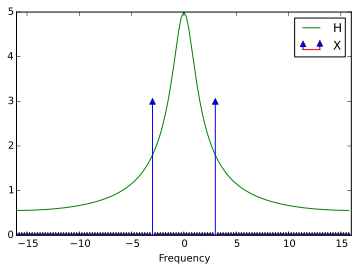

In [111]:
X=fftshift(fft(x))
H=fftshift(fft(h))
M=len(x)
f=arange(M)/M*Fe -Fe/2 
plot(f,abs(H),color='green',label="H")
stem(f,abs(X)*6/M,markerfmt='b^',label="X")
xlim([-16, 16])
xlabel("Frequency")
legend()

The sine wave has frequency $fo=3$. let us measure the values of gain and phase at this frequency:

In [112]:
H3=H[find(f==3)]
print("Value of the complex gain:", H3)
print("Modulus :", abs(H3))
print("Phase (degrees):", angle(H3)/pi*180)

Value of the complex gain: [ 1.08130406-1.43535659j]
Modulus : [ 1.79707178]
Phase (degrees): [-53.00801337]


Now, let us look at this on the time representation. 

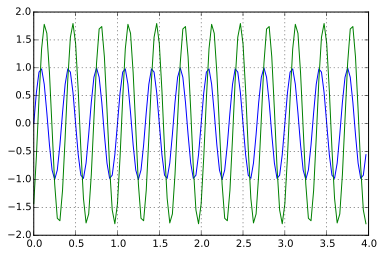

In [113]:
figure()
plot(t,x,t,y3)
grid('on')

Measure of phase: we first measure the delay between the two signals

(0, 0.4)

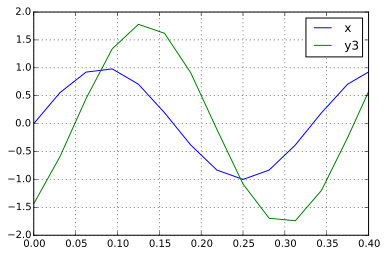

In [114]:
figure()
plot(t,x,label="x")
plot(t,y3,label="y3")
legend()
grid('on')
xlim([0, 0.4])

In [115]:
deltaT=min(find(y3>0))/Fe    
# x begins at 0, the delay is given by the first value where
# y3 becomes >0
print("The value of the phase difference, in degrees,  is ", (2*pi*fo)*deltaT/pi*180,"°")


The value of the phase difference, in degrees,  is  67.5 °


**Observations** : We see that if the input is a sine wave, then the output is **also** a sine wave, up to a gain and phase shift. These gain and phase corresponds exactly to the gain and phase given by the tranfer function.

***

We do this experiment again, but with a pulse train instead of a sine. This is done simply in order to illustrate the fact that this time, the output of the filter is deformed. The sine (and cosine) are the *only* signals which are invariant by linear filtering -- they are the eigenfunctions of linear systems. This is a profound justification of the interest of decomposing signals on sine (and cosine) functions; that is of employing the Fourier representation. 

In [116]:
def rectpulse(x):
    """rectpulse(x): \n
    Returns a pulse train with period  2pi"""
    return sign(sin(x))    

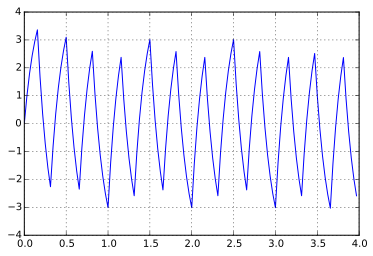

In [117]:
x=rectpulse(2*pi*fo*t)
y=lfilter(h,[1],x)
figure()
plot(t,y)
grid(b=True)


Finally, and for the _fun_, we examin what happens with a larger rectangular pulse. We see in particular the rise and fall time to attain a stable level, like in electrical circuits. 

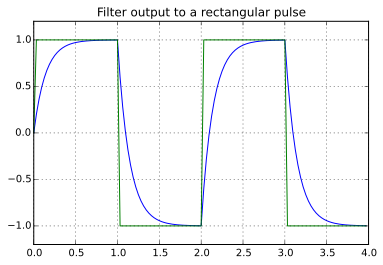

In [118]:
f1=0.5
x=rectpulse(2*pi*f1*t)
y=(1-a)*lfilter(h,[1],x)    # Supplementary question: explain why: 
                            # we introduce here a factor (1-a)figure()
plot(t,y,label='y')
plot(t,x,label='x')
ylim([-1.2, 1.2])
grid(b=True)
title('Filter output to a rectangular pulse')


----
<div align=right> [Index](toc.ipynb) - [Back](Exercises_BasicSystemsRepr.ipynb) - [Next](Continuous_time_case.ipynb)</div>